In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import ben_oop as o
import pandas.io.data as web
import matplotlib

/home/milcent/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
cd /home/milcent/Documentos/Benford\ Datasets

/home/milcent/Documentos/Benford Datasets


In [4]:
ls

layout_01_01_200812.CSV  razao_contas_a_pagar_30092006_31122010.xls  table.csv
layout_01_11_200812.CSV  SPY.csv


In [5]:
i = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [6]:
i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5734 entries, 1993-01-29 to 2015-11-03
Data columns (total 6 columns):
Open         5734 non-null float64
High         5734 non-null float64
Low          5734 non-null float64
Close        5734 non-null float64
Volume       5734 non-null int64
Adj Close    5734 non-null float64
dtypes: float64(5), int64(1)
memory usage: 313.6 KB


In [ ]:
i['Adj_Close']=i['Adj Close']
del i['Adj Close']

###  Reetornos percentual, logarítmico e normalizado

In [13]:
i['p_c'] = i.Adj_Close/i.Adj_Close.shift()-1
i['l_c'] = np.log(i.Adj_Close/i.Adj_Close.shift())
i['norm'] = (i.p_c - i.p_c.mean())/i.p_c.std()
i.tail()

,Open,High,Low,Close,Volume,p_c,l_c,norm,Adj_Close
Date,,,,,,,,,
2015-10-28,207.000000,208.979996,206.210007,208.940002,132528000,0.011473,0.011408,0.927460,208.940002
2015-10-29,208.350006,209.270004,208.210007,208.889999,84727800,-0.000239,-0.000239,-0.055195,208.889999
2015-10-30,209.059998,209.440002,207.740005,207.869995,125338300,-0.004883,-0.004895,-0.444791,207.869995
2015-11-02,208.320007,210.619995,208.169998,210.330002,82533600,0.011834,0.011765,0.957770,210.330002
2015-11-03,209.970001,211.660004,209.699997,210.949997,94524100,0.002948,0.002943,0.212194,210.949997


In [14]:
i.head()

,Open,High,Low,Close,Volume,p_c,l_c,norm,Adj_Close
Date,,,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,NaN,NaN,NaN,28.772289
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,0.007112,0.007087,0.561601,28.976928
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,0.002118,0.002115,0.142540,29.038287
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,0.010572,0.010516,0.851858,29.345279
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,0.004184,0.004175,0.315925,29.468063


In [24]:
i.to_csv('SPY.csv')

### Direto do .csv

In [27]:
i = pd.read_csv('SPY.csv', index_col=0)

In [28]:
i.head()

,Open,High,Low,Close,Volume,p_c,l_c,norm,Adj_Close
Date,,,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,NaN,NaN,NaN,28.772289
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,0.007112,0.007087,0.561601,28.976928
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,0.002118,0.002115,0.142540,29.038287
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,0.010572,0.010516,0.851858,29.345279
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,0.004184,0.004175,0.315925,29.468063


## Início da Análise

In [15]:
ibn = o.Analysis(abs(i.l_c), dec=8)

Initialized sequence with 5733 registries.


In [16]:
ibn.tail()

,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
2015-10-28,0.011408,1140776,1,1,11,114,76
2015-10-29,0.000239,23934,2,3,23,239,34
2015-10-30,0.004895,489493,4,8,48,489,93
2015-11-02,0.011765,1176487,1,1,11,117,87
2015-11-03,0.002943,294338,2,9,29,294,38



---Test performed on 5733 registries.---


The positive deviations` top 20 Z scores are:

             Expected     Found    Z_test
First_2_Dig                              
67           0.006434  0.010291  3.652742
10           0.041393  0.050061  3.294928
66           0.006531  0.009942  3.206881
13           0.032185  0.039421  3.104427
75           0.005752  0.007849  2.099486
69           0.006249  0.008198  1.872861
82           0.005264  0.006977  1.792271
72           0.005990  0.007675  1.652876
54           0.007969  0.009594  1.383530
33           0.012965  0.015001  1.362681
83           0.005201  0.006454  1.318586
85           0.005080  0.006279  1.278008
93           0.004645  0.005756  1.237436
99           0.004365  0.005407  1.197370
95           0.004548  0.005582  1.163717
97           0.004454  0.005407  1.083524
50           0.008600  0.009768  0.957625
19           0.022276  0.024071  0.920810
20           0.021189  0.022676  0.781502
55           0.007825  0.00

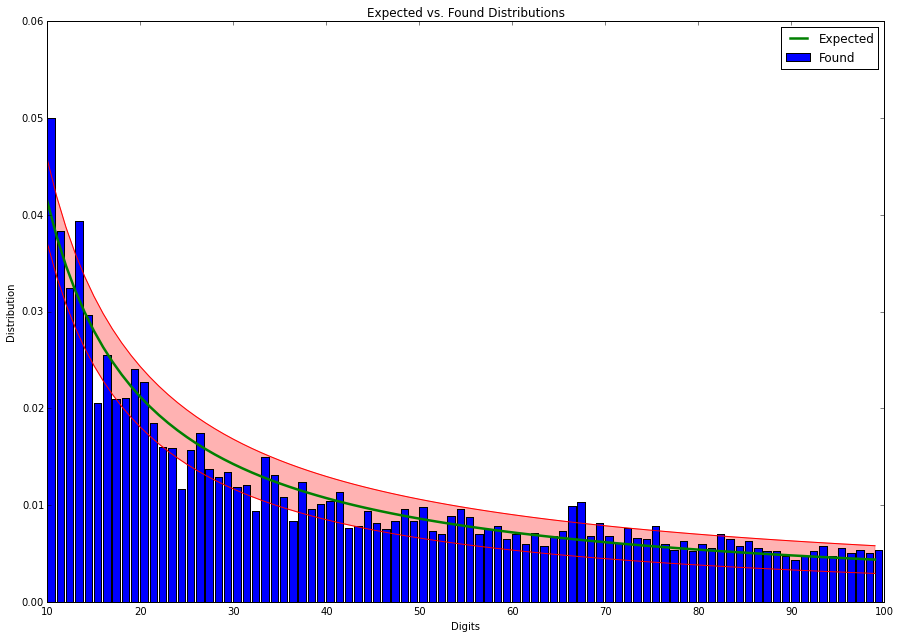

In [21]:
c = ibn.firstDigits(2, conf_level=90)

The Mantissas MEAN is 0.491351095867. Ref: 0.5.
The Mantissas VARIANCE is 0.089730980745. Ref: 0.83333.


ben_oop.py:154: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


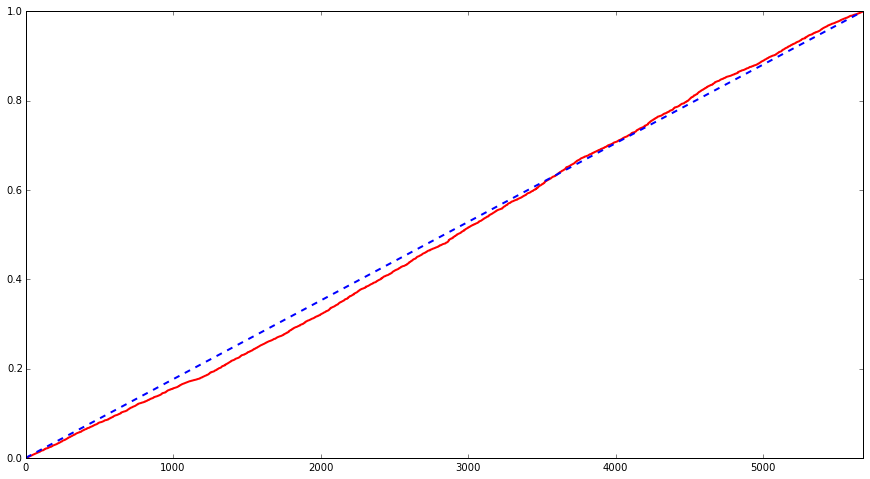

In [22]:
m = ibn.mantissas(plot = True)

In [23]:
ibn.maps

{'F2D': array([67, 10, 66, 13, 75, 69, 82, 72, 54, 33, 83, 85, 93, 99, 95, 97, 50,
        19, 20, 55])}

## Pular para o início com o arquivo .csv

In [27]:
r = pd.read_excel('razao_contas_a_pagar_30092006_31122010.xls',\
                  skiprows=6, parse_cols=[0,1,2,3,5,6,7,8,9],header=0)

In [28]:
r.Ano = r.Ano.apply(o._tint_)
r = r[r.Ano!=0]
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63649 entries, 3 to 63663
Data columns (total 9 columns):
Dia                 54333 non-null object
Ano                 63649 non-null int64
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              21659 non-null object
Credito             34792 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.9+ MB


In [29]:
r = r.reindex(index=np.arange(1,len(r)))
r=r.dropna(how='all')
r.head()

,Dia,Ano,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
3,02/10,2006,000000-MANUAIS,8.1.7.06.00.0 279.0,00019 0004602584-01,19,INTEGRAÇAO DEWIN EST DE LANÇ 4583382 CADAST ...,"171.709,87",NaN
4,NaN,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,02/10,2006,002276-CP001,1.8.8.92.00.4 760.2,00019 0004569188-01,19,INTEGRACAO CONTAS A PAGAR Via Caixa,"332.960,21",NaN
6,02/10,2006,002276-CP001,1.8.8.92.00.4 805.6,00019 0004569189-01,19,INTEGRACAO CONTAS A PAGAR Debito Caixa Ec.Fed.,"100.088,95",NaN
7,02/10,2006,002276-CP001,4.1.1.85.99.1 001.7,00019 0004569190-01,19,INTEGRACAO CONTAS A PAGAR Conta Corrente DE,"7.880.000,00",NaN


In [30]:
r = r[r.Dia.notnull()]
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54318 entries, 3 to 63648
Data columns (total 9 columns):
Dia                 54318 non-null object
Ano                 54318 non-null float64
Remessa - Origem    54318 non-null object
ContraPartida       54318 non-null object
Lancto              54318 non-null object
Destino             42000 non-null float64
Complemento         54318 non-null object
Debito              20595 non-null object
Credito             33723 non-null object
dtypes: float64(2), object(7)
memory usage: 4.1+ MB


In [31]:
r.Ano=r.Ano.astype(int)

In [32]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54318 entries, 3 to 63648
Data columns (total 9 columns):
Dia                 54318 non-null object
Ano                 54318 non-null int64
Remessa - Origem    54318 non-null object
ContraPartida       54318 non-null object
Lancto              54318 non-null object
Destino             42000 non-null float64
Complemento         54318 non-null object
Debito              20595 non-null object
Credito             33723 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [38]:
r.Credito = r.Credito.apply(o._sanitize_latin_float_)
r.Debito = r.Debito.apply(o._sanitize_latin_float_)

In [43]:
r.Credito = r.Credito.convert_objects(convert_numeric=True)
r.Debito = r.Debito.convert_objects(convert_numeric=True)

In [44]:
r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54318 entries, 3 to 63648
Data columns (total 9 columns):
Dia                 54318 non-null object
Ano                 54318 non-null int64
Remessa - Origem    54318 non-null object
ContraPartida       54318 non-null object
Lancto              54318 non-null object
Destino             42000 non-null float64
Complemento         54318 non-null object
Debito              20595 non-null float64
Credito             33722 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [45]:
r.to_csv('table.csv', sep = '\t', encoding='utf-8')

## Iniciar daqui caso não precise manipular o arquivo em Excell

In [5]:
rr = pd.read_csv('table.csv', sep='\t', index_col=1,dayfirst=True,parse_dates={'Data':[1,2]})

In [6]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54333 entries, 3 to 63663
Data columns (total 8 columns):
Data                54333 non-null datetime64[ns]
Remessa - Origem    54333 non-null object
ContraPartida       54333 non-null object
Lancto              54333 non-null object
Destino             42015 non-null float64
Complemento         54333 non-null object
Debito              20600 non-null float64
Credito             33732 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


In [7]:
b = o.Analysis(rr.Credito)

Initialized sequence with 33732 registries.


In [8]:
b.info()

<class 'ben_oop.Analysis'>
Int64Index: 33732 entries, 13 to 63663
Data columns (total 7 columns):
Seq    33732 non-null float64
ZN     33732 non-null int64
F1D    33732 non-null int64
SD     33732 non-null int64
F2D    33732 non-null int64
F3D    33732 non-null int64
L2D    33732 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 2.1+ MB


###  Mantissas

The Mantissas MEAN is 0.498362635231. Ref: 0.5.
The Mantissas VARIANCE is 0.0833405770397. Ref: 0.83333.


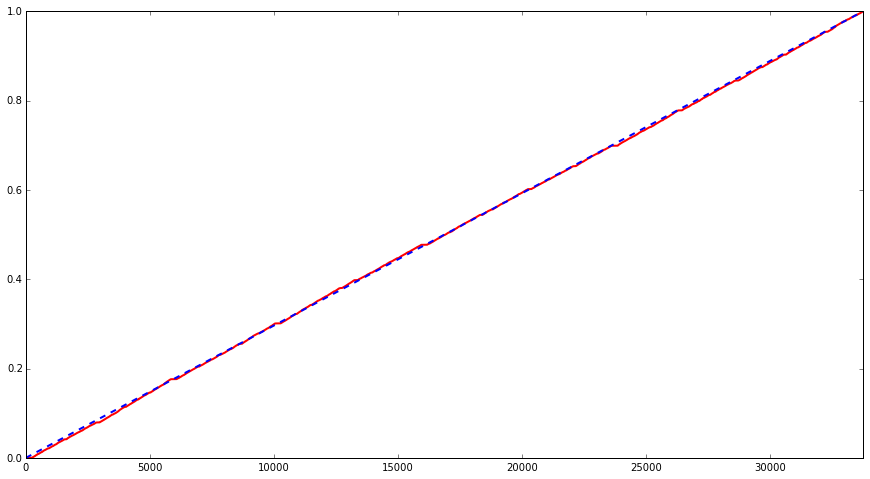

In [9]:
b.mantissas()

In [10]:
b.info()

<class 'ben_oop.Analysis'>
Int64Index: 33732 entries, 13 to 63663
Data columns (total 8 columns):
Seq     33732 non-null float64
ZN      33732 non-null int64
F1D     33732 non-null int64
SD      33732 non-null int64
F2D     33732 non-null int64
F3D     33732 non-null int64
L2D     33732 non-null object
Mant    33732 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB


In [11]:
b.head()

,Seq,ZN,F1D,SD,F2D,F3D,L2D,Mant
13,31980.00,3198000,3,1,31,319,00,0.504878
14,773446.87,77344687,7,7,77,773,87,0.888430
15,13659.00,1365900,1,3,13,136,00,0.135419
16,10726.00,1072600,1,0,10,107,00,0.030438
17,30253.32,3025332,3,0,30,302,32,0.480773


## Teste dos Dois Primeiros Dígitos


---Test performed on 33732 registries.---


The entries with the significant positive deviations are:

             Expected     Found     Z_test
First_2_Dig                               
50           0.008600  0.013904  10.548942
30           0.014240  0.019892   8.760910
60           0.007179  0.010821   7.923301
70           0.006160  0.009042   6.763755
90           0.004799  0.006848   5.446065
40           0.010724  0.013637   5.194367
25           0.017033  0.020633   5.109644
15           0.028029  0.031810   4.207075
10           0.041393  0.045743   4.010985
20           0.021189  0.024250   3.903283
35           0.012234  0.014141   3.185078
80           0.005395  0.006611   3.048576
45           0.009545  0.011028   2.800832

The Mean Absolute Deviation is 0.00103810167029
	For the First Two Digits:
	- 0.0000 to 0.0012: Close Conformity
	- 0.0012 to 0.0018: Acceptable Conformity
	- 0.0018 to 0.0022: Marginally Acceptable Conformity
	- Above 0.0022: Nonconformity


/home/milcent/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


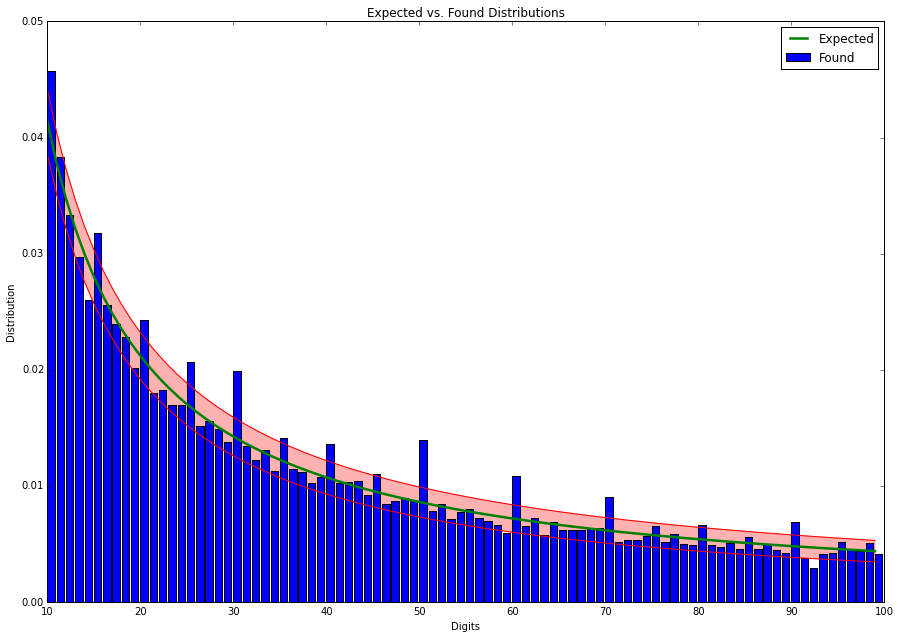

In [12]:
b.firstDigits(2, conf_level=99, show_high_Z ='pos')


In [13]:
b.maps

{'F2D': array([50, 30, 60, 70, 90, 40, 25, 15, 10, 20, 35, 80, 45])}


---Test performed on 33732 registries.---


The entries with the significant positive deviations are:

         Expected     Found     Z_test
Sec_Dig                               
0        0.119679  0.150866  17.646398
5        0.096677  0.109095   7.717713

The Mean Absolute Deviation is 0.00872087272386
	For the Second Digits:
	- 0.0000 to 0.0008: Close Conformity
	- 0.0008 to 0.0010: Acceptable Conformity
	- 0.0010 to 0.0012: Marginally Acceptable Conformity
	- Above 0.0012: Nonconformity


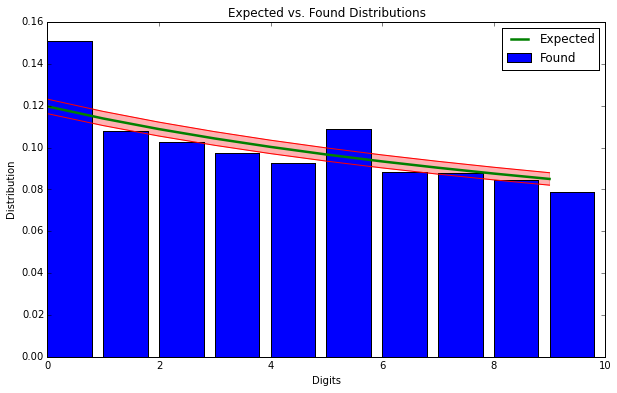

In [14]:
b.secondDigit(show_high_Z='pos')


---Test performed on 33732 registries.---


The entries with the significant positive deviations are:

            Expected     Found      Z_test
Last_2_Dig                                
00          0.010101  0.295921  524.971201
50          0.010101  0.025851   28.928015
40          0.010101  0.015475    9.870373
80          0.010101  0.015267    9.489221
20          0.010101  0.014615    8.291312
60          0.010101  0.014586    8.236861
90          0.010101  0.012244    3.935279
10          0.010101  0.011858    3.227424


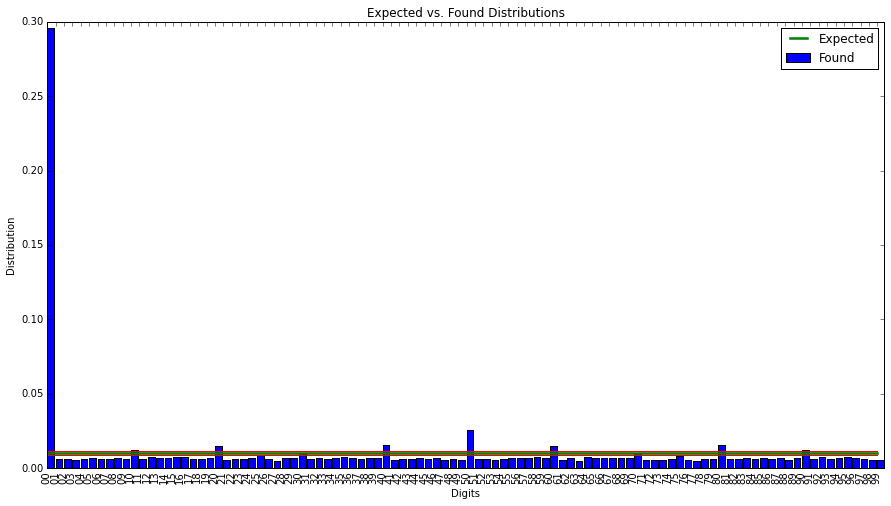

In [16]:
b.lastTwoDigits()

In [17]:
b.maps

{'F2D': array([50, 30, 60, 70, 90, 40, 25, 15, 10, 20, 35, 80, 45]),
 'LTD': array([ 0, 50, 40, 80, 20, 60, 90, 10]),
 'SD': array([0, 5])}

In [50]:
bb =b.copy()
bb.head()

,Seq,ZN,FD,SD,FTD,LTD
13,31980.00,3198000,3,1,31,00
14,773446.87,77344687,7,7,77,87
15,13659.00,1365900,1,3,13,00
16,10726.00,1072600,1,0,10,00
17,30253.32,3025332,3,0,30,32


In [71]:
e = bb.FTD == 30
u = bb.FTD ==50
e|u

In [51]:
bb['Ord']=np.nan
for n,i in enumerate(b.maps['FTD']):
    bb.Ord.loc[bb.FTD==i]=n

In [53]:
bb.head()

,Seq,ZN,FD,SD,FTD,LTD,Ord
13,31980.00,3198000,3,1,31,00,NaN
14,773446.87,77344687,7,7,77,87,NaN
15,13659.00,1365900,1,3,13,00,NaN
16,10726.00,1072600,1,0,10,00,NaN
17,30253.32,3025332,3,0,30,32,1


In [54]:
bb = bb.dropna()
bb.head()

,Seq,ZN,FD,SD,FTD,LTD,Ord
17,30253.32,3025332,3,0,30,32,1
41,30.00,3000,3,0,30,00,1
44,30.00,3000,3,0,30,00,1
153,50224.00,5022400,5,0,50,00,0
188,500.00,50000,5,0,50,00,0


In [55]:
bb = bb[['Seq','Ord']].sort('Ord')

In [57]:
dd = bb.join(rr)
dd.head()

,Seq,Ord,Data,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
27095,500.0,0,2008-04-10,002655-CP001,8.1.7.99.00.0 654.4,00019 0008055405-02,19,INTEGRACAO CONTAS A PAGAR Desp. Buscas Apreen...,NaN,500.0
41549,50.0,0,2009-02-25,002876-CP001,8.1.7.75.00.0 604.3,00019 0009123124-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,50.0
41432,500.0,0,2009-02-19,002874-CP001,8.1.7.75.00.0 604.3,00019 0009113788-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,500.0
41407,505.1,0,2009-02-19,002717-ERP-CSC,8.1.7.42.00.2 412.9,00019 0009116002-02,NaN,INTEGRAÇÃO ERP-ORACLE ORACLE EBS,NaN,505.1
15382,50228.0,0,2007-08-23,002500-CP001,8.1.7.57.00.4 492.3,00019 0005658812-02,19,INTEGRACAO CONTAS A PAGAR Servicos Graficos,NaN,50228.0


In [59]:
dd

,Seq,Ord,Data,Remessa - Origem,ContraPartida,Lancto,Destino,Complemento,Debito,Credito
27095,500.00,0,2008-04-10,002655-CP001,8.1.7.99.00.0 654.4,00019 0008055405-02,19,INTEGRACAO CONTAS A PAGAR Desp. Buscas Apreen...,NaN,500.00
41549,50.00,0,2009-02-25,002876-CP001,8.1.7.75.00.0 604.3,00019 0009123124-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,50.00
41432,500.00,0,2009-02-19,002874-CP001,8.1.7.75.00.0 604.3,00019 0009113788-02,19,INTEGRACAO CONTAS A PAGAR Ajuda De Custo - Vi...,NaN,500.00
41407,505.10,0,2009-02-19,002717-ERP-CSC,8.1.7.42.00.2 412.9,00019 0009116002-02,NaN,INTEGRAÇÃO ERP-ORACLE ORACLE EBS,NaN,505.10
15382,50228.00,0,2007-08-23,002500-CP001,8.1.7.57.00.4 492.3,00019 0005658812-02,19,INTEGRACAO CONTAS A PAGAR Servicos Graficos,NaN,50228.00
41375,50600.00,0,2009-02-18,002873-CP001,8.1.7.06.00.0 270.6,00019 0009106108-02,19,INTEGRACAO CONTAS A PAGAR Alugueis De Imoveis,NaN,50600.00
41336,5083.22,0,2009-02-17,002872-CP001,8.1.7.57.00.4 521.0,00019 0009105004-02,19,INTEGRACAO CONTAS A PAGAR Comissao - Franquias,NaN,5083.22
42273,5.09,0,2009-03-16,002891-CP001,4.9.4.20.10.8 113.3,00019 0009192247-02,19,INTEGRACAO CONTAS A PAGAR CONTR. SOCIAL S/ LU...,NaN,5.09
15511,501452.93,0,2007-08-27,002502-CP001,8.1.7.12.00.1 280.0,00019 0005678697-02,19,INTEGRACAO CONTAS A PAGAR Correios Telegr.selos,NaN,501452.93
15814,502.08,0,2007-08-31,002506-CP001,8.1.7.99.00.0 645.5,00019 0005709873-02,19,INTEGRACAO CONTAS A PAGAR Txs e Emol Judiciai...,NaN,502.08


In [29]:
for n,i in enumerate(b.maps['FTD']):
    g = bb.FTD==i
    if n==0:
        mm = g
    else:
        mm = mm|g   

In [31]:
sum(mm)

1505

In [32]:
bb = bb[mm]
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 17 to 63602
Data columns (total 6 columns):
Seq    1505 non-null float64
ZN     1505 non-null int64
FD     1505 non-null int64
SD     1505 non-null int64
FTD    1505 non-null int64
LTD    1505 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 82.3+ KB


In [33]:
bb['I']=bb.index

In [38]:
bb.sort(['FTD','I']).set_index(['FTD','I'])['Seq']

FTD  I    
30   17         30253.32
     41            30.00
     44            30.00
     215          306.12
     407          300.00
     625        30250.00
     723      3000000.00
     919       300000.00
     989        30000.00
     1147         302.61
     1148          30.00
     1187       30813.50
     1202         302.79
     1216        3067.30
     1231        3000.00
     1347         307.18
     1595       30430.00
     1630        3053.50
     1702          30.00
     1732         300.00
     1817         300.00
     1866         302.03
     1868          30.00
     1880        3012.30
     1920       30000.00
     1974         305.19
     1983         300.00
     1988         300.00
     2051       30000.00
     2066        3000.00
                 ...    
60   57612      60601.46
     57681      60362.72
     57697          6.09
     57723      60387.28
     58279       6012.71
     58386         60.25
     58586        600.00
     58647     601778.89
     59079    

In [47]:
index = pd.MultiIndex.from_arrays([bb.FTD,bb.index], names=['FTD', 'ind'])

In [51]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

MultiIndex(levels=[[1, 2], [u'blue', u'red']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]],
           names=[u'number', u'color'])

In [56]:
bb = bb.set_index(index)
bb.head()

,,Seq,ZN,FD,SD,FTD,LTD
FTD,ind,,,,,,
31,13,31980.00,3198000,3,1,31,00
77,14,773446.87,77344687,7,7,77,87
13,15,13659.00,1365900,1,3,13,00
10,16,10726.00,1072600,1,0,10,00
30,17,30253.32,3025332,3,0,30,32


In [60]:
bb.reindex()

ValueError: cannot set an array element with a sequence